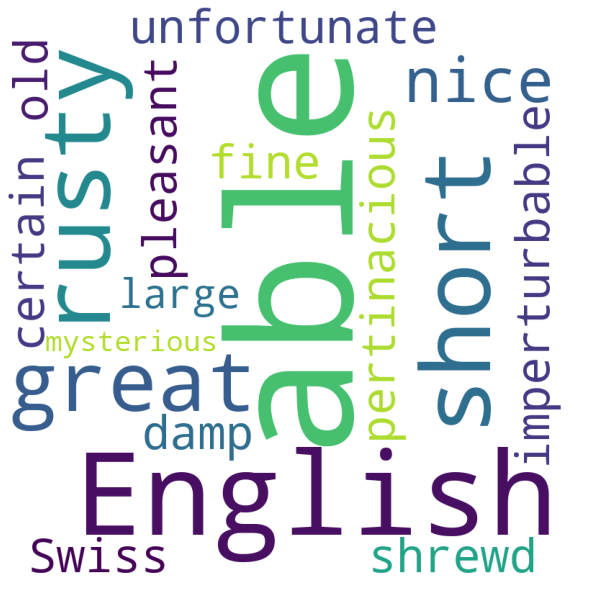

In [7]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

lists = ['nice', 'unfortunate', 'short', 'rusty', 'short', 'rusty', 'able', 
'able', 'pleasant', 'able', 'great', 'imperturbable', 'shrewd', 'damp', 'fine',
'English', 'English', 'old', 'English', 'pertinacious', 'Swiss', 'certain',
'large', 'mysterious', 'great']
string_version=" ".join(lists)
stopwords = set(STOPWORDS)
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(string_version)

# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [8]:
# Read adjectives from all_adjectives file, pack into a list of lists
with open("Outputs/all_adjectives_expanded.txt", 'r') as f:
    adjective_lists = []
    for line in f:
        adj_list_single_cat = line.strip()
        adj_list_single_cat = adj_list_single_cat.replace("'", "")
        divided_adj_list_single_cat = adj_list_single_cat[1:-1].split(",")
        adjective_lists.append(divided_adj_list_single_cat)

#    for list in lists:
#        adjective_list.append(list)
#print(adjective_list)
# Match each item in list to word category

# Find average sentiment score for each adjective list
# Graph scores for each category


In [39]:
# Sentiment Scores

word_categories = ["gentleman", "lady", "politician", "lawyer", "banker",
"clergyman", "military (high rank)", "doctor", "soldier", "businessman",
"clerk", "policeman", "schoolteacher", "student", "innkeeper", "tailor",
"craftsman", "seamstress", "male servant", "nurse", "governess",
"female servant", "farmer", "waiter", "fisherman", "street peddlar",
"washerwoman", "navvy", "miner", "nightman", "orphan", "criminal"]

import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

from text_analysis import sentiment_countifier_individual

def sentiment_score_all_adjectives(all_adjective_lists):
    sentiment_score_list = []
    for list in all_adjective_lists:
        sentiments = sentiment_countifier_individual(list)
        sentiment_score_list.append(sentiments)
    return sentiment_score_list



[[0.0, 0.0, 0.0]]


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/malvinaclavering/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


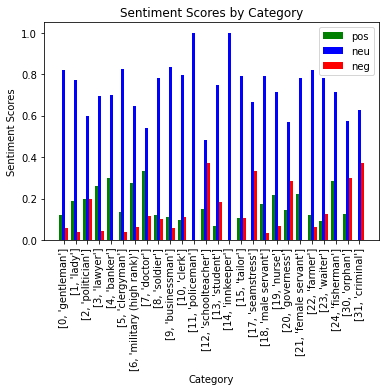

In [49]:
import numpy as np
import matplotlib.pyplot as plt

# Plot scores for all categories with adjectives
scores_list = sentiment_score_all_adjectives(adjective_lists)
trimmed_word_categories2=[]
for word,index in enumerate(word_categories):
    trimmed_word_categories2.append([word,index])
trimmed_word_categories=[]
for i, category in enumerate(word_categories):
    if adjective_lists[i] != [""]:
        trimmed_word_categories.append(trimmed_word_categories2[i])

number_of_categories = len(trimmed_word_categories)
ind = np.arange(number_of_categories)
width = .25

pos_scores = []
neu_scores = []
neg_scores = []

for category_number, category in enumerate(trimmed_word_categories):
    pos_scores.append(scores_list[category[0]][0])
    neu_scores.append(scores_list[category[0]][1])
    neg_scores.append(scores_list[category[0]][2])
    

bar1 = plt.bar(ind, pos_scores, width, color = 'g')
bar2 = plt.bar(ind+width, neu_scores, width, color='b')
bar3 = plt.bar(ind+width*2, neg_scores, width, color = 'r')

plt.xlabel("Category")
plt.ylabel("Sentiment Scores")
plt.title("Sentiment Scores by Category")

plt.xticks(ind+width, trimmed_word_categories, rotation='vertical')
plt.legend( (bar1, bar2, bar3), ('pos', 'neu', 'neg') )
plt.show()


# plt.bar(word_categories, scores)

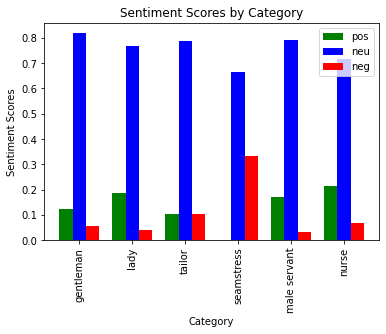

In [57]:
gender_categories_indexes = [0,1,15,17,18,19]
gender_categories = [word_categories[w] for w in gender_categories_indexes]


scores_list = sentiment_score_all_adjectives(adjective_lists)

number_of_categories = len(gender_categories)
ind = np.arange(number_of_categories)
width = .25

pos_scores = []
neu_scores = []
neg_scores = []

for category_number, category in enumerate(gender_categories):
    pos_scores.append(scores_list[gender_categories_indexes[category_number]][0])
    neu_scores.append(scores_list[gender_categories_indexes[category_number]][1])
    neg_scores.append(scores_list[gender_categories_indexes[category_number]][2])
    

bar1 = plt.bar(ind, pos_scores, width, color = 'g')
bar2 = plt.bar(ind+width, neu_scores, width, color='b')
bar3 = plt.bar(ind+width*2, neg_scores, width, color = 'r')

plt.xlabel("Category")
plt.ylabel("Sentiment Scores")
plt.title("Sentiment Scores by Category")

plt.xticks(ind+width, gender_categories, rotation='vertical')
plt.legend( (bar1, bar2, bar3), ('pos', 'neu', 'neg') )
plt.show()